<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Launch Sites Locations Analysis with Folium**


Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:
- **TASK 1:** Mark all launch sites on a map
- **TASK 2:** Mark the success/failed launches for each site on the map
- **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [2]:
!pip3 install folium
!pip3 install wget

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ------------------------- ------------- 71.7/108.4 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 900.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   ---------------------------------------- 83.9/83.9 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=d644152d2ffc4f5abca9442d4b44da82bc1d571d773b104b76dd00e9b823adbb
  Stored in directory: c:\users\dedof\appdata\local\pip\cache\wheels\01\46\3b\e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import folium
import wget
import pandas as pd

In [ ]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/DV0101EN-3-5-1-Generating-Maps-in-Python-py-v2.0.ipynb)


## Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site. 


In [4]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

Now, you can take a look at what are the coordinates for each site.


In [5]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [6]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [8]:
import folium
from folium.features import DivIcon

# Define the coordinates for NASA Johnson Space Center
nasa_coordinate = [29.5593, -95.0897]

# Create a map centered around NASA Johnson Space Center
site_map = folium.Map(location=nasa_coordinate, zoom_start=15)

# Create an orange circle at NASA Johnson Space Center's coordinate
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))

# Create a blue circle at NASA Johnson Space Center's coordinate with an icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
    )
)

# Add the circle and the marker to the map
site_map.add_child(circle)
site_map.add_child(marker)

# Display the map


We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example, 


In [9]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle. 


Now, let's add a circle for each launch site in data frame `launch_sites`


_TODO:_  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [10]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label


The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png">
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:
- Are all launch sites in proximity to the Equator line?
- Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


# Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [11]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records. 
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


In [13]:
import folium
from folium.plugins import MarkerCluster

# Crea un mapa
mapa = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

# Crea un MarkerCluster
marker_cluster = MarkerCluster().add_to(mapa)

# Añade marcadores al cluster
for lat, lon in [[45.5236, -122.6750], [45.5234, -122.6752], [45.5232, -122.6754]]:
    folium.Marker(location=[lat, lon]).add_to(marker_cluster)

# Muestra el mapa
mapa.save('mapa_con_cluster.html')


Let's first create a `MarkerCluster` object


In [14]:
marker_cluster = MarkerCluster()


_TODO:_ Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


In [15]:

# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red


In [16]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


_TODO:_ For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


In [17]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map

Your updated map may look like the following screenshots:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png">
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png">
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


# TASK 3: Calculate the distances between a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [19]:
import folium
from folium.plugins import MousePosition

# Crear un mapa
site_map = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

# Añadir Mouse Position para obtener las coordenadas (Lat, Long) al pasar el ratón sobre el mapa
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=5,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)

# Guardar el mapa en un archivo HTML
site_map.save('mapa_con_mouse_position.html')


In [20]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method:


In [21]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

_TODO:_ Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [ ]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

_TODO:_ After obtained its coordinate, create a `folium.Marker` to show the distance


In [22]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

_TODO:_ Draw a `PolyLine` between a launch site to the selected coastline point


In [ ]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png">
</center>


_TODO:_ Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png">
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png">
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png">
</center>


In [ ]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site


After you plot distance lines to the proximities, you can answer the following questions easily:
- Are launch sites in close proximity to railways?
- Are launch sites in close proximity to highways?
- Are launch sites in close proximity to coastline?
- Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


### Other Contributors


Joseph Santarcangelo


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2021-05-26|1.0|Yan|Created the initial version|


Copyright © 2021 IBM Corporation. All rights reserved.


In [23]:
import wget
import pandas as pd

# Descargar el archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
spacex_csv_file = wget.download(url)

# Leer el archivo CSV usando pandas
spacex_df = pd.read_csv(spacex_csv_file)

# Mostrar las primeras filas del DataFrame para verificar
print(spacex_df.head())


   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class        Lat  \
0        LEO           SpaceX  Failure   (

In [24]:
import folium

# Crear un mapa centrado en un punto específico
mapa = folium.Map(location=[30, -100], zoom_start=4)

# Añadir marcadores para cada sitio de lanzamiento
launch_sites = spacex_df[['Launch Site', 'Lat', 'Long']].drop_duplicates()

for index, site in launch_sites.iterrows():
    folium.Marker(
        location=[site['Lat'], site['Long']],
        popup=site['Launch Site'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('launch_sites_map.html')


In [25]:
for index, row in spacex_df.iterrows():
    color = 'green' if row['class'] == 1 else 'red'  # Verde para éxito, rojo para fracaso
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Launch Site'],
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('launch_success_failure_map.html')


In [26]:
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

launch_sites = launch_sites['Launch Site'].unique()

app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': site, 'value': site} for site in launch_sites],
        value=launch_sites[0]
    ),
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=100,
        marks={i: str(i) for i in range(0, 10001, 1000)},
        value=[0, 10000]
    ),
    dcc.Graph(id='success-pie-chart'),
    dcc.Graph(id='payload-outcome-scatter')
])

@app.callback(
    Output('success-pie-chart', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_pie_chart(site, payload_range):
    filtered_data = spacex_df[
        (spacex_df['Launch Site'] == site) &
        (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
        (spacex_df['Payload Mass (kg)'] <= payload_range[1])
    ]
    success_counts = filtered_data['class'].value_counts()
    fig = px.pie(
        values=success_counts.values,
        names=success_counts.index,
        title=f'Success vs Failed Launches for {site}'
    )
    return fig

@app.callback(
    Output('payload-outcome-scatter', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_plot(site, payload_range):
    filtered_data = spacex_df[
        (spacex_df['Launch Site'] == site) &
        (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
        (spacex_df['Payload Mass (kg)'] <= payload_range[1])
    ]
    fig = px.scatter(
        filtered_data,
        x='Payload Mass (kg)',
        y='class',
        color='Booster Version Category',
        title=f'Payload vs. Outcome for {site}'
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[26], line 58, in update_scatter_plot(
    site='CCAFS LC-40',
    payload_range=[0, 10000]
)
     47 @app.callback(
     48     Output('payload-outcome-scatter', 'figure'),
     49     [Input('site-dropdown', 'value'),
     50      Input('payload-slider', 'value')]
     51 )
     52 def update_scatter_plot(site, payload_range):
     53     filtered_data = spacex_df[
     54         (spacex_df['Launch Site'] == site) &
     55         (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
     56         (spacex_df['Payload Mass (kg)'] <= payload_range[1])
     57     ]
---> 58     fig = px.scatter(
        px = <module 'plotly.express' from 'c:\\Users\\dedof\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\plotly\\express\\__init__.py'>
        filtered_data =     Flight Number        Date Time (UTC) Booster Ver

In [27]:
import wget
import pandas as pd

# Descargar el archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
spacex_csv_file = wget.download(url)

# Leer el archivo CSV usando pandas
spacex_df = pd.read_csv(spacex_csv_file)

# Verificar las primeras filas del DataFrame
print(spacex_df.head())


   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class        Lat  \
0        LEO           SpaceX  Failure   (

In [28]:
import folium

# Crear un mapa centrado en un punto específico
mapa = folium.Map(location=[30, -100], zoom_start=4)

# Añadir marcadores para cada sitio de lanzamiento
launch_sites = spacex_df[['Launch Site', 'Lat', 'Long']].drop_duplicates()

for index, site in launch_sites.iterrows():
    folium.Marker(
        location=[site['Lat'], site['Long']],
        popup=site['Launch Site'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('launch_sites_map.html')
# 

In [29]:
for index, row in spacex_df.iterrows():
    color = 'green' if row['class'] == 1 else 'red'  # Verde para éxito, rojo para fracaso
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Launch Site'],
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('launch_success_failure_map.html')


In [30]:
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

launch_sites = launch_sites['Launch Site'].unique()

app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': site, 'value': site} for site in launch_sites],
        value=launch_sites[0]
    ),
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=100,
        marks={i: str(i) for i in range(0, 10001, 1000)},
        value=[0, 10000]
    ),
    dcc.Graph(id='success-pie-chart'),
    dcc.Graph(id='payload-outcome-scatter')
])

@app.callback(
    Output('success-pie-chart', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_pie_chart(site, payload_range):
    filtered_data = spacex_df[
        (spacex_df['Launch Site'] == site) &
        (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
        (spacex_df['Payload Mass (kg)'] <= payload_range[1])
    ]
    success_counts = filtered_data['class'].value_counts()
    fig = px.pie(
        values=success_counts.values,
        names=success_counts.index,
        title=f'Success vs Failed Launches for {site}'
    )
    return fig

@app.callback(
    Output('payload-outcome-scatter', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_plot(site, payload_range):
    filtered_data = spacex_df[
        (spacex_df['Launch Site'] == site) &
        (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
        (spacex_df['Payload Mass (kg)'] <= payload_range[1])
    ]
    
    # Verificar si la columna 'Booster Version Category' existe, si no, crearla para evitar errores
    if 'Booster Version Category' not in filtered_data.columns:
        filtered_data['Booster Version Category'] = 'Unknown'
    
    fig = px.scatter(
        filtered_data,
        x='Payload Mass (kg)',
        y='class',
        color='Booster Version Category',
        title=f'Payload vs. Outcome for {site}'
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\dedof\AppData\Local\Temp\ipykernel_39176\927445045.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dedof\AppData\Local\Temp\ipykernel_39176\927445045.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
!pip install numpy pandas seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[1 2 3 4 5]
   column1  column2
0        1        5
1        2        6
2        3        7
3        4        8


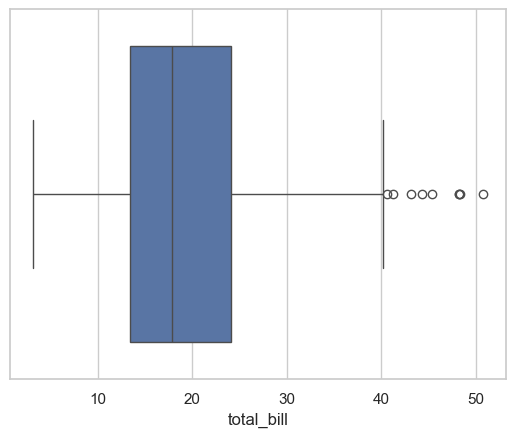

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

# Ejemplo de uso de numpy
array = np.array([1, 2, 3, 4, 5])
print(array)

# Ejemplo de uso de pandas
data = {'column1': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]}
df = pd.DataFrame(data)
print(df)

# Ejemplo de uso de seaborn
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])


In [35]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

[1 2 3 4 5]
   column1  column2
0        1        5
1        2        6
2        3        7
3        4        8


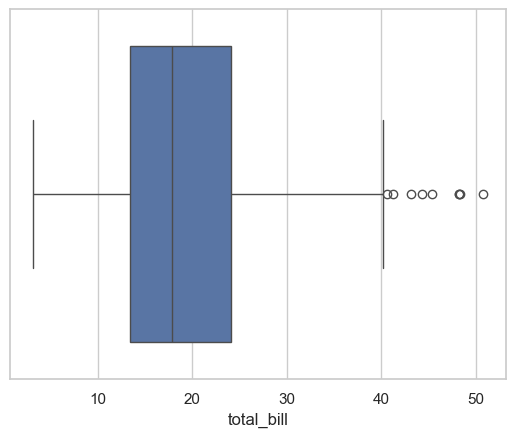

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

# Ejemplo de uso de numpy
array = np.array([1, 2, 3, 4, 5])
print(array)

# Ejemplo de uso de pandas
data = {'column1': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]}
df = pd.DataFrame(data)
print(df)

# Ejemplo de uso de seaborn
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])


[1 2 3 4 5]
   column1  column2
0        1        5
1        2        6
2        3        7
3        4        8


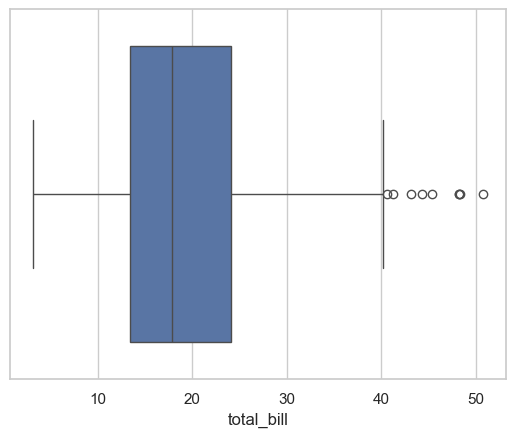

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

# Ejemplo de uso de numpy
array = np.array([1, 2, 3, 4, 5])
print(array)

# Ejemplo de uso de pandas
data = {'column1': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]}
df = pd.DataFrame(data)
print(df)

# Ejemplo de uso de seaborn
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])


In [39]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [40]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [41]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

ModuleNotFoundError: No module named 'js'

In [42]:
!pip install requests pandas


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import requests
import pandas as pd

# URL del archivo CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


NameError: name 'io' is not defined

In [44]:
!pip install requests pandas



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [46]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [47]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [48]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

ModuleNotFoundError: No module named 'js'

In [49]:
!pip install requests pandas



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [51]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [52]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

NameError: name 'fetch' is not defined

In [53]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0             1.0         

In [54]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())

# Crear un array de NumPy a partir de la columna 'Class'
Y = data['Class'].to_numpy()

# Verificar el contenido de Y
print(Y)


   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0             1.0         

KeyError: 'Class'

In [55]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [56]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Crear un array de NumPy a partir de la columna 'class' (ajustar el nombre según corresponda)
Y = data['class'].to_numpy()

# Verificar el contenido de Y
print(Y)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

KeyError: 'class'

In [57]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Ajuste según el nombre exacto de la columna que obtuviste
# Crear un array de NumPy a partir de la columna con el nombre exacto
Y = data['Class '].to_numpy()  # Ajusta 'Class ' al nombre correcto

# Verificar el contenido de Y
print(Y)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

KeyError: 'Class '

In [58]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Usar el nombre exacto de la columna 'Class' (asegúrate de que sea el nombre correcto)
column_name = 'Class'  # Ajusta esto según la salida de print(data.columns)

# Crear un array de NumPy a partir de la columna con el nombre exacto
Y = data[column_name].to_numpy()

# Verificar el contenido de Y
print(Y)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

KeyError: 'Class'

In [59]:
# Limpiar los nombres de las columnas
data.columns = data.columns.str.strip()

# Verificar nuevamente los nombres de las columnas
print(data.columns)

# Usar el nombre exacto de la columna 'Class'
column_name = 'Class'  # Ajusta esto según la salida de print(data.columns)
Y = data[column_name].to_numpy()

# Verificar el contenido de Y
print(Y)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

KeyError: 'Class'

In [60]:
from sklearn.preprocessing import StandardScaler

# Supongamos que tus datos están en un DataFrame llamado data y que las características están en una variable X
X = data.drop(columns=['Class'])  # Excluye la columna objetivo
Y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


KeyError: "['Class'] not found in axis"

In [61]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [62]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Asumir que 'PayloadMass' es la columna objetivo
column_name = 'PayloadMass'  # Ajusta esto según la columna correcta

# Crear las variables X e Y
X = data.drop(columns=[column_name])  # Excluye la columna objetivo
Y = data[column_name]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Encontrar los mejores hiperparámetros para RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo en los datos de prueba
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Precisión del modelo en datos de prueba: {accuracy}")


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 421, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [63]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Usar 'PayloadMass' como la columna objetivo
column_name = 'PayloadMass'  # Ajusta esto según la columna correcta

# Crear las variables X e Y
X = data.drop(columns=[column_name])  # Excluye la columna objetivo
Y = data[column_name]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Encontrar los mejores hiperparámetros para RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio del modelo en los datos de prueba
mse = mean_squared_error(Y_test, Y_pred)
print(f"Error cuadrático medio del modelo en datos de prueba: {mse}")


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [64]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Crear una variable objetivo binaria
data['Target'] = (data['PayloadMass'] > 5000).astype(int)

# Crear las variables X e Y
X = data.drop(columns=['PayloadMass', 'Target'])  # Excluye la columna objetivo original y la nueva
Y = data['Target']

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Encontrar los mejores hiperparámetros para RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo en los datos de prueba
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Precisión del modelo en datos de prueba: {accuracy}")


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [65]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Crear una variable objetivo binaria
data['Target'] = (data['PayloadMass'] > 5000).astype(int)

# Crear las variables X e Y
X = data.drop(columns=['PayloadMass', 'Target'])  # Excluye la columna objetivo original y la nueva
Y = data['Target']

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Encontrar los mejores hiperparámetros para RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo en los datos de prueba
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Precisión del modelo en datos de prueba: {accuracy}")


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [66]:
num_records_test_sample = X_test.shape[0]
print(f"Number of records in the test sample: {num_records_test_sample}")


Number of records in the test sample: 18


In [67]:
from sklearn.svm import SVC

param_grid_svc = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100]
}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
grid_search_svc.fit(X_train, Y_train)

best_kernel = grid_search_svc.best_params_['kernel']
print(f"Best kernel for SVM: {best_kernel}")


Best kernel for SVM: sigmoid


In [68]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, Y_train)

best_model_dt = grid_search_dt.best_estimator_
Y_pred_dt = best_model_dt.predict(X_test)

accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Accuracy of the best Decision Tree model on test data: {accuracy_dt * 100:.2f}%")


Accuracy of the best Decision Tree model on test data: 66.67%
